In [1]:
import tensorflow as tf
import keras
import numpy as np

Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

#BatchNormalization
#from keras.optimizers import SGD,Adam
#from keras.callbacks import ReduceLROnPlateau

from keras.datasets import cifar10
from keras.applications import VGG19,ResNet50

In [0]:
from PIL import Image
from matplotlib import pyplot

%matplotlib inline

# Helper Function

In [0]:
def plot_model_history(model_history):
    # summarize history for accuracy
    pyplot.plot(history.history['accuracy'])
    pyplot.plot(history.history['val_accuracy'])
    pyplot.title('model accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    pyplot.show()
    
    # summarize history for loss
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    pyplot.show()
    

In [0]:
#helper function
def show_image(img, label="", zoom=False):
    #labelname[y_train[0,0].astype(int)]
    if not zoom:
        #pyplot.figure(figsize=(4,3))
        pyplot.subplot(330 + 1 + i)
    else:
        pyplot.figure(figsize=(6,3))
        pyplot.subplot(1,2,1)
        pyplot.grid(False)
    pyplot.xticks([])
    pyplot.yticks([])
    #pyplot.imshow(img, cmap=pyplot.cm.binary)
    pyplot.xlabel('{code} - {label}'.format(code=label, label=labelname[label]))
    pyplot.imshow(img, cmap=pyplot.cm.binary)

#helper function
def show_image_prediction(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  pyplot.grid(False)
  pyplot.xticks([])
  pyplot.yticks([])
  
  pyplot.imshow(img, cmap=pyplot.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
    
  if predicted_label == true_label:
    color = 'blue'
   
  else:
    color = 'red'
  
  pyplot.xlabel("{} {:2.0f}% ({})".format(labelname[predicted_label],
                                100*np.max(predictions_array),
                                labelname[true_label[0]]),
                                color=color)

def show_value_prediction(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  pyplot.grid(False)
  pyplot.xticks([])
  pyplot.yticks([])
  thisplot = pyplot.bar(range(10), predictions_array, color="#777777")
  pyplot.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
   
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')

# Data Preaparation

In [3]:

(train_img, train_label), (test_img, test_label) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
#Split training data into training and validation
from sklearn.model_selection import train_test_split

train_img,val_img,train_label,val_label=train_test_split(train_img,train_label,test_size=.3)

In [5]:
#Print the dimensions of the datasets to make sure everything's OK
print('training data:', (train_img.shape,train_label.shape))
print('validation data:', (val_img.shape,val_label.shape))
print('test data:', (test_img.shape,test_label.shape))

training data: ((35000, 32, 32, 3), (35000, 1))
validation data: ((15000, 32, 32, 3), (15000, 1))
test data: ((10000, 32, 32, 3), (10000, 1))


In [0]:
# Change label to one-hot-encoding
num_classes = 10
train_label_one_hot=keras.utils.to_categorical(train_label, num_classes)
val_label_one_hot=keras.utils.to_categorical(val_label, num_classes)
test_label_one_hot=keras.utils.to_categorical(test_label, num_classes)


In [0]:
#integer to float
train_img_f = train_img.astype('float32')
val_img_f = val_img.astype('float32')
test_img_f = test_img.astype('float32')
train_img_f /= 255
val_img_f /= 255
test_img_f /= 255

In [8]:
#Print the dimensions of the datasets to make sure everything's OK
print('training data:', (train_img_f.shape,train_label_one_hot.shape))
print('validation data:', (val_img_f.shape,val_label_one_hot.shape))
print('test data:', (test_img_f.shape,test_label_one_hot.shape))

training data: ((35000, 32, 32, 3), (35000, 10))
validation data: ((15000, 32, 32, 3), (15000, 10))
test data: ((10000, 32, 32, 3), (10000, 10))


In [0]:
lrr= ReduceLROnPlateau(
                       monitor='val_acc', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_acc, the learning rate is reduced
                       min_lr=1e-5) #The minimum learning rate 

# Create Model

In [9]:
model_vgg = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=num_classes)

80142336/80134624 [==============================] - 3s 0us/step


In [0]:
train_label.shape[1]

In [0]:
model_vgg.summary()

In [0]:
model= Sequential()
model.add(model_vgg) #Adds the base model (in this case vgg19 to model)
model.add(Flatten())

In [0]:
model.summary()

In [0]:
#Add the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
model.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [0]:
model.summary()

# Training Preparation

In [0]:
learn_rate=.001

sgd=keras.optimizers.SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=keras.optimizers.Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

# Train the Model

In [14]:
import os
import datetime
import time

batch_size= 100
epochs=30
start = time.time()
history = model.fit(train_img_f, train_label_one_hot,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(val_img_f, val_label_one_hot),
              shuffle=True)

# Save model and weights
now = datetime.datetime.now()

Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 23s 645us/step - loss: 1.4190 - accuracy: 0.4931 - val_loss: 0.8827 - val_accuracy: 0.6945
Epoch 2/5
35000/35000 [==============================] - 16s 454us/step - loss: 0.8319 - accuracy: 0.7159 - val_loss: 0.7373 - val_accuracy: 0.7498
Epoch 3/5
35000/35000 [==============================] - 16s 451us/step - loss: 0.6935 - accuracy: 0.7667 - val_loss: 0.6373 - val_accuracy: 0.7805
Epoch 4/5
35000/35000 [==============================] - 16s 452us/step - loss: 0.5813 - accuracy: 0.8039 - val_loss: 0.6411 - val_accuracy: 0.7810
Epoch 5/5
35000/35000 [==============================] - 16s 450us/step - loss: 0.5066 - accuracy: 0.8298 - val_loss: 0.6231 - val_accuracy: 0.7911


In [15]:
batch_size= 100
epochs=30
start = time.time()
history = model.fit(train_img_f, train_label_one_hot,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(val_img_f, val_label_one_hot),
              shuffle=True)

# Save model and weights
now = datetime.datetime.now()

Train on 35000 samples, validate on 15000 samples
Epoch 1/30
35000/35000 [==============================] - 16s 452us/step - loss: 0.4479 - accuracy: 0.8515 - val_loss: 0.5693 - val_accuracy: 0.8125
Epoch 2/30
35000/35000 [==============================] - 16s 449us/step - loss: 0.3896 - accuracy: 0.8685 - val_loss: 0.6256 - val_accuracy: 0.8026
Epoch 3/30
35000/35000 [==============================] - 16s 453us/step - loss: 0.3381 - accuracy: 0.8870 - val_loss: 0.5805 - val_accuracy: 0.8107
Epoch 4/30
35000/35000 [==============================] - 16s 453us/step - loss: 0.2920 - accuracy: 0.9004 - val_loss: 0.6043 - val_accuracy: 0.8113
Epoch 5/30
35000/35000 [==============================] - 16s 449us/step - loss: 0.2440 - accuracy: 0.9188 - val_loss: 0.5734 - val_accuracy: 0.8255
Epoch 6/30
35000/35000 [==============================] - 16s 452us/step - loss: 0.2107 - accuracy: 0.9296 - val_loss: 0.6402 - val_accuracy: 0.8115
Epoch 7/30
35000/35000 [==============================] 

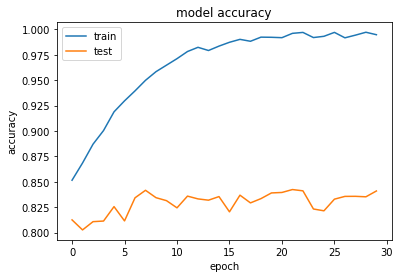

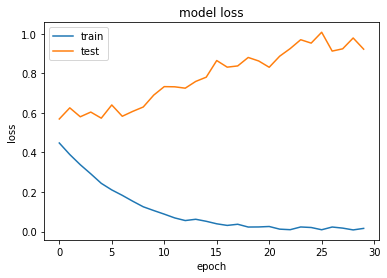

In [19]:
plot_model_history(history)

# Evaluate Model

In [20]:
test_loss, test_acc = model.evaluate(test_img_f, test_label_one_hot)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 318us/step
Test accuracy: 0.8360999822616577


In [0]:
predictions = model.predict(test_img_f)

array([1.4029761e-09, 1.0759006e-08, 1.8196251e-07, 9.9938428e-01,
       9.5557127e-08, 6.1482936e-04, 4.4102947e-07, 9.0622613e-08,
       1.3703984e-08, 1.7306517e-08], dtype=float32)

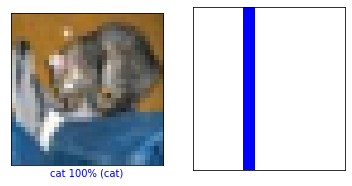

In [23]:
labelname = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
i = 0
pyplot.figure(figsize=(6,3))
pyplot.subplot(1,2,1)
show_image_prediction(i, predictions, test_label, test_img)
pyplot.subplot(1,2,2)
show_value_prediction(i, predictions, test_label)
predictions[i]

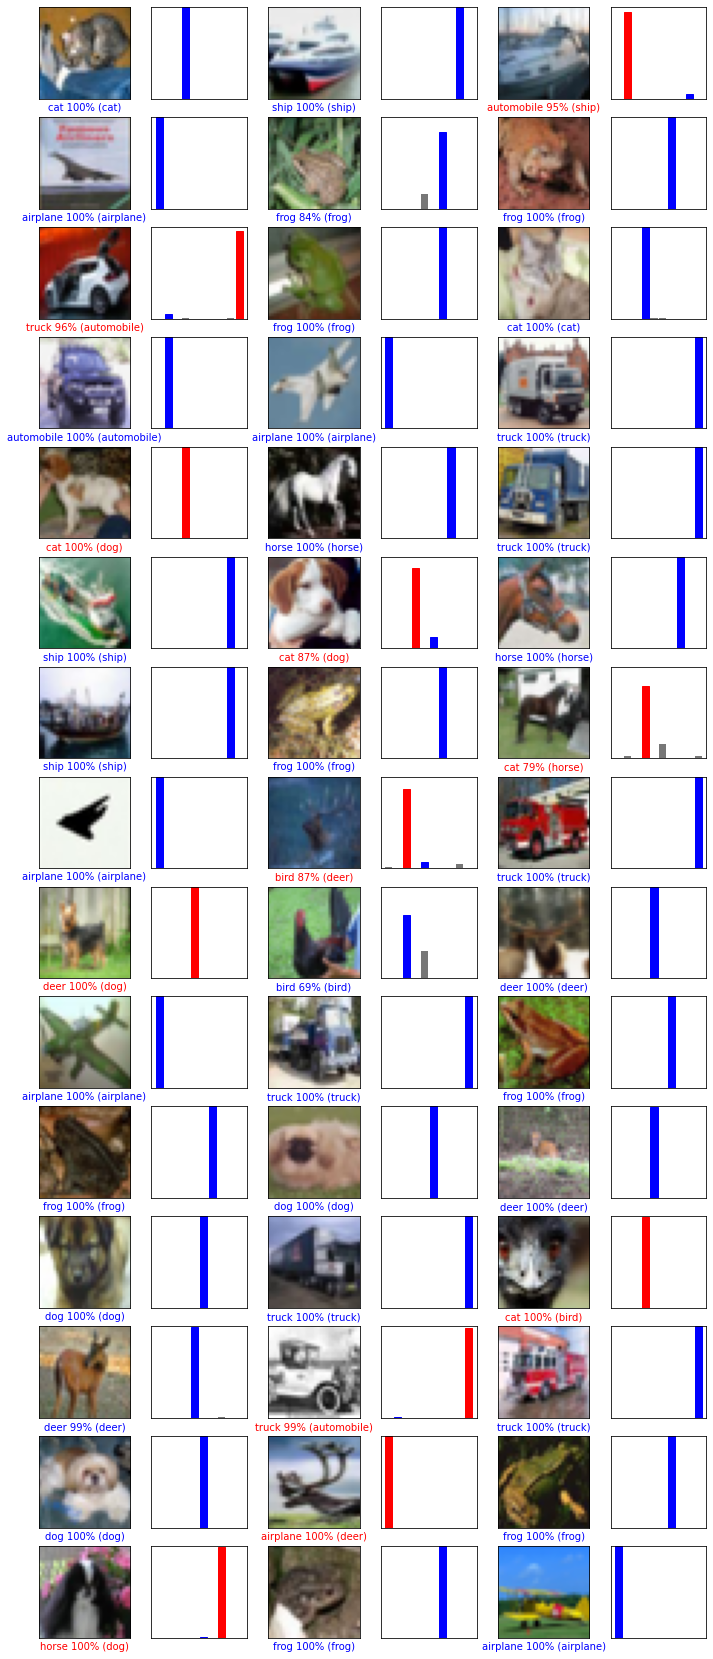

In [24]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
pyplot.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  pyplot.subplot(num_rows, 2*num_cols, 2*i+1)
  show_image_prediction(i, predictions, test_label, test_img)
  pyplot.subplot(num_rows, 2*num_cols, 2*i+2)
  show_value_prediction(i, predictions, test_label)